## Preliminaries
Assess fine-tuning and feature extraction results

### Import relevant libraries

In [77]:
from sklearn.metrics import classification_report, confusion_matrix
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import joblib
import cv2

### Read in testing data 
- Testing features
- Testing lables
- Csv that maps class indices to class names

In [78]:
test_features_file = "../Output/image_features/ten/test_features.csv"
test_labels_file = "../Output/image_features/ten/test_labels.csv"

test_features_df = pd.read_csv(test_features_file); del test_features_df['Unnamed: 0']
print("Imported testing features")
test_labels_df = pd.read_csv(test_labels_file); del test_labels_df['Unnamed: 0']
print("Imported training labels")

Imported testing features
Imported training labels


In [79]:
# From dataframe to array
test_features = test_features_df.values
test_labels = test_labels_df['Class'].values

In [168]:
# Class indices-names
file = "../Output/image_features/ten/class_indices.csv"
classes_df = pd.read_csv(file); del classes_df['Unnamed: 0']
classes_df

,ID,Class
0,0,applauding
1,1,climbing
2,2,cooking
3,3,feeding a horse
4,4,holding an umbrella
5,5,jumping
6,6,playing guitar
7,7,riding a bike
8,8,riding a horse
9,9,walking the dog


## Fine Tuning
Compare five attempts: VGG19, ResNet50, MobileNet, Xception, InceptionResNetV2.

The function below generates a grid of plots and will be used to visualize model accuracy vs epoch as well as model loss vs epoch.

In [81]:
def fine_tune_plots(acc_or_loss):
    fig = plt.figure(figsize=(24., 20.))
    plt.rcParams.update({"font.size": 15})
    
    # Build list of dataframes and model names for use in for loop
    model_names = ["VGG19", "ResNet50", "MobileNet", "Xception", "InceptionResNetV2"]
    dataframes = [vgg19_df, resnet50_df, mobilenet_df, 
               xception_df, inception_resnet_df]
    
    for i in range(len(dataframes)):
        plot_idx = 330+i+1
        plt.subplot(plot_idx)

        plt.plot(dataframes[i][acc_or_loss[0]], label="Train Accuracy")
        plt.plot(dataframes[i][acc_or_loss[1]], label="Test Accuracy")

        plt.xlabel("Epoch")
        plt.ylabel("Accuracy")
        plt.title(model_names[i])
        plt.legend()

    plt.subplots_adjust(hspace=0.3)
    plt.show()

Read in csvs with model accuracy and loss

In [82]:
vgg19_df = pd.read_csv("../Output/fine_tune_history/VGG19.csv")
del vgg19_df['Unnamed: 0']

In [83]:
resnet50_df = pd.read_csv("../Output/fine_tune_history/ResNet50.csv")
del resnet50_df['Unnamed: 0']

In [84]:
mobilenet_df = pd.read_csv("../Output/fine_tune_history/MobileNet.csv")
del mobilenet_df['Unnamed: 0']

In [85]:
xception_df = pd.read_csv("../Output/fine_tune_history/Xception.csv")
del xception_df['Unnamed: 0']

In [86]:
inception_resnet_df = pd.read_csv("../Output/fine_tune_history/InceptionResNetV2.csv")
del inception_resnet_df['Unnamed: 0']

Plot model accuracy during training

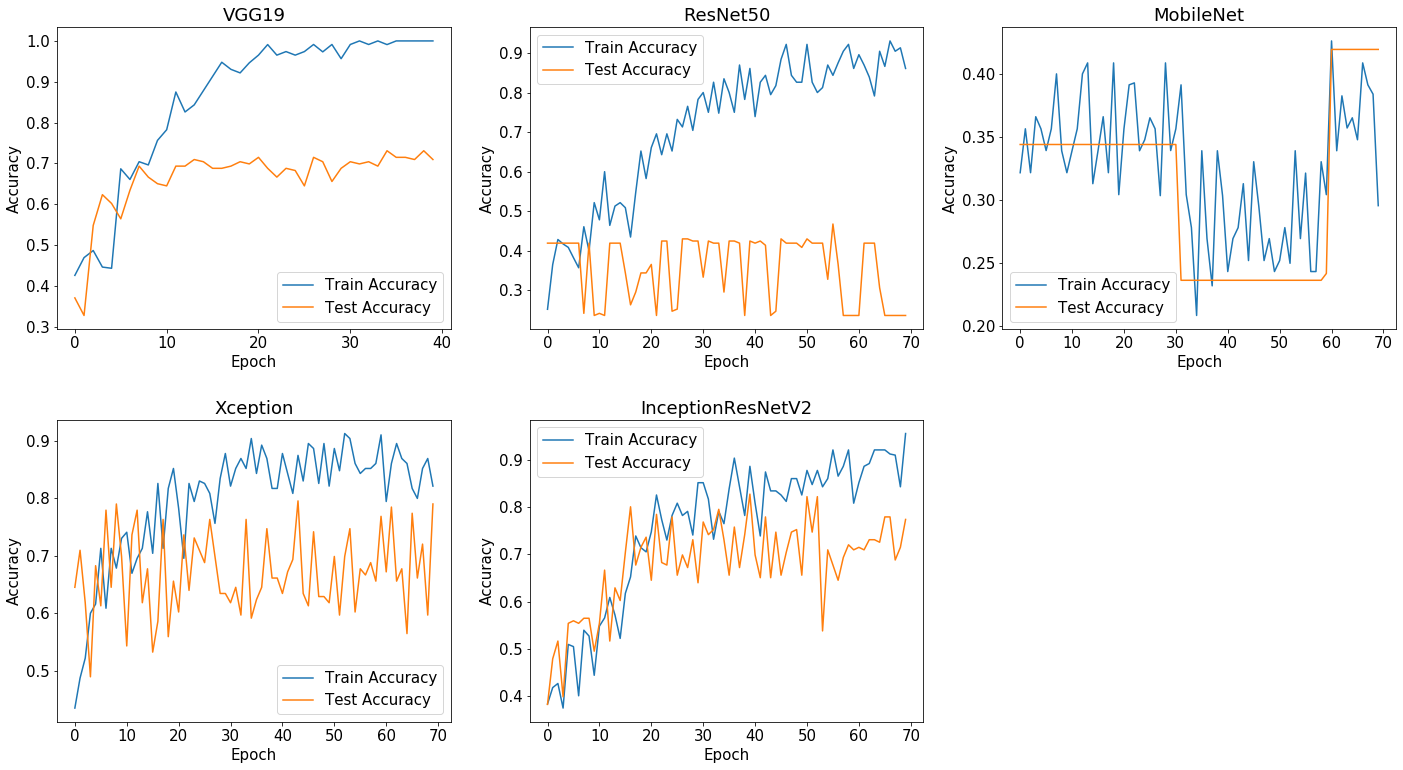

In [87]:
fine_tune_plots(["train_acc", "test_acc"])

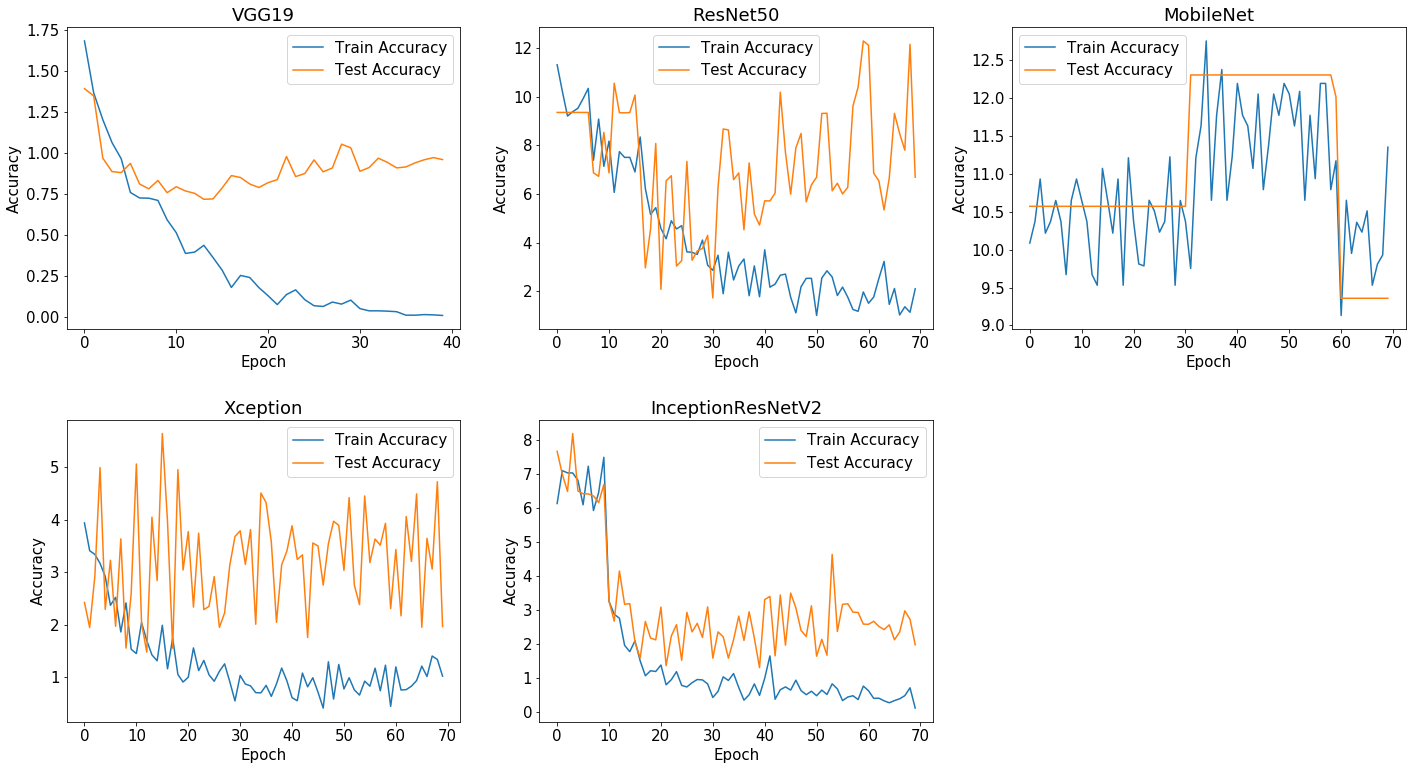

In [88]:
fine_tune_plots(["train loss", "test_loss"])

Final model accuracies

In [89]:
final_acc = ["{:0.3f}".format(mobilenet_df['test_acc'].values[-1]),
             "{:0.3f}".format(resnet50_df['test_acc'].values[-1]),
             "{:0.3f}".format(vgg19_df['test_acc'].values[-1]),
             "{:0.3f}".format(xception_df['test_acc'].values[-1]),
             "{:0.3f}".format(inception_resnet_df['test_acc'].values[-1])
            ]
cols = ["MobileNet", "ResNet50", "VGG19", "Xception", "InceptionResNetV2"]

In [90]:
fine_tune_accuracy = pd.DataFrame({"Accuracy": final_acc}, index=cols)
fine_tune_accuracy.sort_values('Accuracy', ascending=False)

,Accuracy
Xception,0.790
InceptionResNetV2,0.774
VGG19,0.710
MobileNet,0.419
ResNet50,0.237


# Compare Classifiers

### Compare Testing Accuracies
Three different classifiers and two experiments
- First experiment: 70/30 train test split
- Second experiment: 80/20 train test split

Read in csvs with testing scores

In [146]:
first_iteration = pd.read_csv("../Output/feature_extraction/classifiers_eval_1st_tuned.csv")
second_iteration = pd.read_csv("../Output/feature_extraction/classifiers_eval_2nd.csv")

del first_iteration['Unnamed: 0']
del second_iteration['Unnamed: 0']

In [147]:
first_iteration = first_iteration.drop(0)
first_iteration = first_iteration[["Name", "Testing Score"]]
first_iteration

,Name,Testing Score
1,Random Forest Classifier,0.812
2,Logistic Regression,0.823
3,Support Vector Machine,0.806


In [148]:
second_iteration = second_iteration.drop(3).drop(4)
second_iteration = second_iteration[["Name", "Testing Score"]]
second_iteration

,Name,Testing Score
0,Logistic Regression,0.956
1,Random Forest Classification,0.904
2,Support Vector Machine,0.935


Bar chart set-up

In [149]:
# Set width of bar
bar_width = 0.25
 
# Set height of bar
LR_bars = [0.823, 0.956]
RFC_bars = [0.812, 0.904]
SVM_bars = [0.806, 0.935]
 
# Set position of bar on X axis
x1 = np.arange(len(LR_bars))
x2 = [x + bar_width for x in x1]
x3 = [x + bar_width for x in x2]

In [141]:
def annotate_bar_chart(bars):
    for bar in bars:
        height = bar.get_height()
        plt.annotate('{}'.format(height),
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     ha='center', va='bottom')

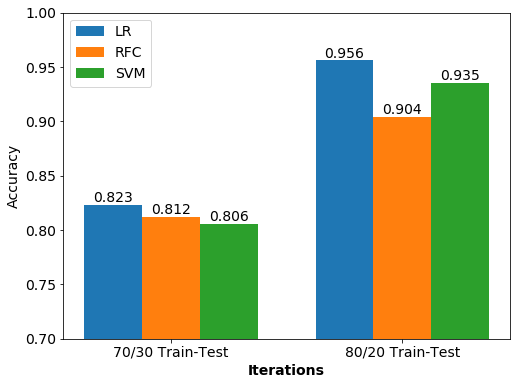

In [150]:
fig = plt.figure(figsize=(8., 6.))
plt.rcParams.update({"font.size": 14})
    
# Plot
bar_LR = plt.bar(x1, LR_bars, width=bar_width, label='LR')
bar_RFC = plt.bar(x2, RFC_bars, width=bar_width, label='RFC')
bar_SVM = plt.bar(x3, SVM_bars, width=bar_width, label='SVM')
 
# Add xticks on the middle of the group bars
plt.xlabel('Iterations', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(bar_LR))], ['70/30 Train-Test', '80/20 Train-Test'])

plt.ylabel("Accuracy")
plt.ylim(0.7, 1)

# Annotate chart
annotate_bar_chart(bar_LR)
annotate_bar_chart(bar_RFC)
annotate_bar_chart(bar_SVM)

plt.legend(loc='upper left')
plt.show()


### In-Depth Assessment of Models
- Classification Report
- Confusion Matrics

In [184]:
model_paths = ["../Output/models/ten/LR.sav",
               "../Output/models/ten/RFC.sav",
               "../Output/models/ten/SVM.sav"
               ]

In [185]:
def plot_confusion_matrix(df):
    fig = plt.figure(figsize=(10,7))
    plt.rcParams.update({'font.size': 13})
    
    #Plot
    g = sns.heatmap(df, linewidth=0.5, cmap='PuBu', annot=True)
    
    # Xticks and axes labels
    plt.xlabel('Predicted Class', fontsize=15)
    plt.ylabel('Actual Class', fontsize=15)
    g.set_xticklabels(g.get_xticklabels(), rotation = 45)
    
    # Adjust y-limits
    b, t = plt.ylim()
    b += 0.5; t -= 0.5
    plt.ylim(b, t)
    
    plt.title("Confusion Matrix - Model Accuracy per Class\n", fontsize=18, fontweight='bold')
    plt.savefig("../Output/plots/confusion_matrix.png")
    plt.show()

In [186]:
def model_assessment(model):
    ten_actions = classes_df['Class'].values
    prediction = model.predict(test_features)
    print(classification_report(test_labels, prediction, target_names=ten_actions))
    
    cm = confusion_matrix(test_labels, prediction)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    df = pd.DataFrame(cm, index=ten_actions, columns=ten_actions)
    
    plot_confusion_matrix(df)

#### Logistic Regression

                     precision    recall  f1-score   support

         applauding       0.92      0.94      0.93        64
           climbing       0.95      0.98      0.97        62
            cooking       0.98      0.98      0.98        60
    feeding a horse       0.93      0.89      0.91        57
holding an umbrella       0.96      1.00      0.98        55
            jumping       0.97      0.88      0.92        65
     playing guitar       0.98      0.98      0.98        56
      riding a bike       1.00      1.00      1.00        61
     riding a horse       0.94      0.94      0.94        67
    walking the dog       0.94      0.99      0.96        69

           accuracy                           0.96       616
          macro avg       0.96      0.96      0.96       616
       weighted avg       0.96      0.96      0.96       616



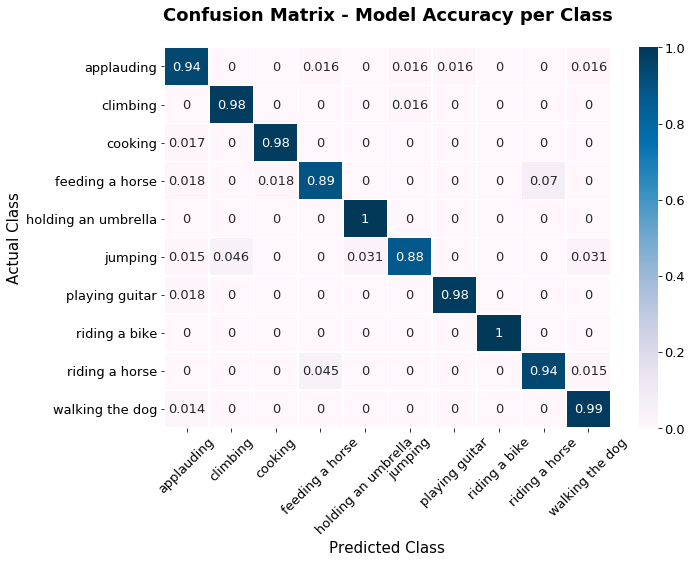

In [188]:
lr = joblib.load(model_paths[0])
model_assessment(lr)

#### Random Forest

                     precision    recall  f1-score   support

         applauding       0.88      0.88      0.88        64
           climbing       0.96      0.87      0.92        62
            cooking       0.94      0.98      0.96        60
    feeding a horse       0.81      0.75      0.78        57
holding an umbrella       0.93      1.00      0.96        55
            jumping       0.88      0.82      0.85        65
     playing guitar       0.93      0.98      0.96        56
      riding a bike       1.00      1.00      1.00        61
     riding a horse       0.83      0.79      0.81        67
    walking the dog       0.88      0.99      0.93        69

           accuracy                           0.90       616
          macro avg       0.90      0.91      0.90       616
       weighted avg       0.90      0.90      0.90       616



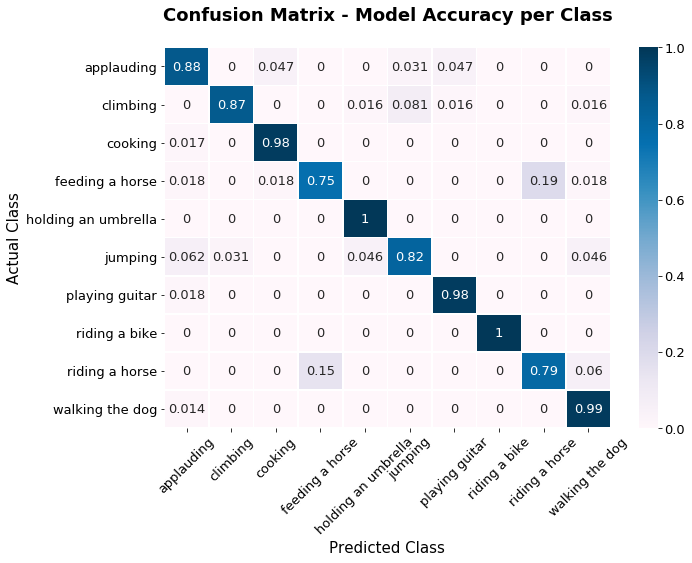

In [187]:
rfc = joblib.load(model_paths[1])
model_assessment(rfc)

#### Support Vector Machine

                     precision    recall  f1-score   support

         applauding       0.91      0.94      0.92        64
           climbing       0.95      0.89      0.92        62
            cooking       0.98      0.98      0.98        60
    feeding a horse       0.83      0.86      0.84        57
holding an umbrella       0.98      1.00      0.99        55
            jumping       0.90      0.85      0.87        65
     playing guitar       0.98      0.98      0.98        56
      riding a bike       1.00      1.00      1.00        61
     riding a horse       0.91      0.87      0.89        67
    walking the dog       0.92      1.00      0.96        69

           accuracy                           0.94       616
          macro avg       0.94      0.94      0.94       616
       weighted avg       0.94      0.94      0.93       616



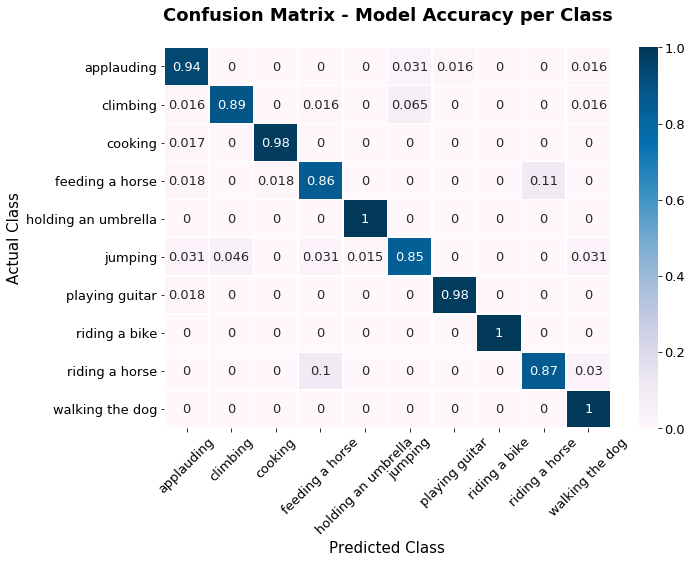

In [189]:
svm = joblib.load(model_paths[2])
model_assessment(svm)